In [1]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# stats models: regression fitting
import statsmodels.formula.api as smf
# data visualization
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df.shape

(706, 34)

In [4]:
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


<AxesSubplot: xlabel='totwrk', ylabel='sleep'>

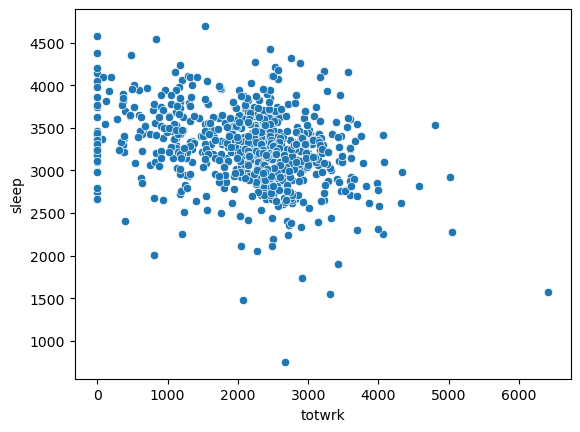

In [5]:
sns.scatterplot(data=df, y='sleep', x='totwrk')

<AxesSubplot: xlabel='totwrk', ylabel='sleep'>

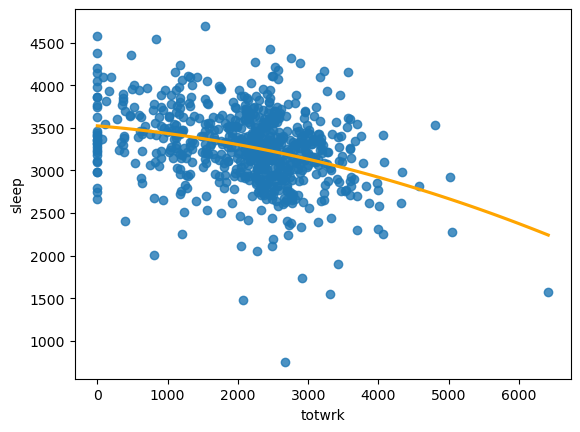

In [15]:
sns.regplot(order=2, data=df, y='sleep', x='totwrk', ci=None, line_kws={"color": "orange"})

In [3]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~-1+totwrk', data=df).fit()
# коэффициенты с округлением
fitted_line.params

NameError: name 'smf' is not defined

In [16]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~totwrk', data=df).fit()
# коэффициенты с округлением
fitted_line.params

Intercept    3586.376952
totwrk         -0.150746
dtype: float64

In [17]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(sleep)~-1+totwrk+I(totwrk**2)', data=df).fit()
# коэффициенты с округлением
fitted_line.params

totwrk            0.006446
I(totwrk ** 2)   -0.000001
dtype: float64